# LeNet-5

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.utils import data
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
from training import compute_accuracy
from tools import save_net, show_predictions

In [2]:
skip_training = False

In [3]:
device = torch.device('cuda:0') #device = torch.device('cpu')

In [4]:
if skip_training:
    device = torch.device("cpu")

## Load data

In [5]:
transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),  # Transform to tensor
    transforms.Normalize((0.5,), (0.5,))  # Min-max scaling to [-1, 1]
])

data_dir = 'tiny-imagenet-200/'
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform)

classes = pd.read_csv('wnids.txt',header=None).values
words = pd.read_csv('words.txt',sep="\t",header=None,names=['class','words'])
words = words.set_index('class')

trainloader = data.DataLoader(train_dataset, batch_size=32, shuffle=True)
valloader = data.DataLoader(val_dataset, batch_size=5, shuffle=True)
testloader = data.DataLoader(test_dataset, batch_size=5, shuffle=True)

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # YOUR CODE HERE
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 200)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)
        x = F.relu(self.fc1(x.reshape(-1,32*16)))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [10]:
net = Net()
net.to(device)

with torch.no_grad():
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    images = images.to(device)
    print('Shape of the input tensor:', images.shape)

    y = net(images)
    assert y.shape == torch.Size([32, 200]), "Bad shape of y: y.shape={}".format(y.shape)

print('The shapes seem to be ok.')

Shape of the input tensor: torch.Size([32, 1, 28, 28])
The shapes seem to be ok.


In [11]:
# Define the loss and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [15]:
n_epochs = 30

In [16]:
net.train()
for epoch in range(n_epochs):
    running_loss = 0.0
    print_every = 200  # mini-batches
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # Transfer to GPU
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (i % print_every) == (print_every-1):
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/print_every))
            running_loss = 0.0
        if skip_training:
            break

    # Print accuracy after every epoch
    accuracy = compute_accuracy(net, device, valloader)
    print('Accuracy of the network on the test images: %.3f' % accuracy)

    if skip_training:
        break

print('Finished Training')

[1,   200] loss: 5.300
[1,   400] loss: 5.299
[1,   600] loss: 5.299
[1,   800] loss: 5.301
[1,  1000] loss: 5.300
[1,  1200] loss: 5.300
[1,  1400] loss: 5.301
[1,  1600] loss: 5.301
[1,  1800] loss: 5.299
[1,  2000] loss: 5.300
[1,  2200] loss: 5.299
[1,  2400] loss: 5.300
[1,  2600] loss: 5.300
[1,  2800] loss: 5.300
[1,  3000] loss: 5.301
Accuracy of the network on the test images: 0.007
[2,   200] loss: 5.299
[2,   400] loss: 5.299
[2,   600] loss: 5.300
[2,   800] loss: 5.298
[2,  1000] loss: 5.299
[2,  1200] loss: 5.298
[2,  1400] loss: 5.297
[2,  1600] loss: 5.297
[2,  1800] loss: 5.297
[2,  2000] loss: 5.297
[2,  2200] loss: 5.297
[2,  2400] loss: 5.296
[2,  2600] loss: 5.296
[2,  2800] loss: 5.295
[2,  3000] loss: 5.297
Accuracy of the network on the test images: 0.007
[3,   200] loss: 5.295
[3,   400] loss: 5.293
[3,   600] loss: 5.293
[3,   800] loss: 5.290
[3,  1000] loss: 5.294
[3,  1200] loss: 5.293
[3,  1400] loss: 5.290
[3,  1600] loss: 5.287
[3,  1800] loss: 5.287
[3,

[21,  1400] loss: 4.111
[21,  1600] loss: 4.104
[21,  1800] loss: 4.084
[21,  2000] loss: 4.086
[21,  2200] loss: 4.090
[21,  2400] loss: 4.063
[21,  2600] loss: 4.061
[21,  2800] loss: 4.076
[21,  3000] loss: 4.074
Accuracy of the network on the test images: 0.121
[22,   200] loss: 4.021
[22,   400] loss: 4.051
[22,   600] loss: 4.005
[22,   800] loss: 4.043
[22,  1000] loss: 4.073
[22,  1200] loss: 4.027
[22,  1400] loss: 4.036
[22,  1600] loss: 4.054
[22,  1800] loss: 4.054
[22,  2000] loss: 4.052
[22,  2200] loss: 4.045
[22,  2400] loss: 4.040
[22,  2600] loss: 4.068
[22,  2800] loss: 4.020
[22,  3000] loss: 4.048
Accuracy of the network on the test images: 0.124
[23,   200] loss: 3.987
[23,   400] loss: 3.976
[23,   600] loss: 4.024
[23,   800] loss: 3.986
[23,  1000] loss: 4.001
[23,  1200] loss: 3.998
[23,  1400] loss: 4.028
[23,  1600] loss: 4.030
[23,  1800] loss: 4.031
[23,  2000] loss: 4.030
[23,  2200] loss: 4.030
[23,  2400] loss: 4.019
[23,  2600] loss: 4.012
[23,  2800] 

In [ ]:
if not skip_training:
    filename = 'lenet_epoch_50.pth'
    save_net(net, filename)

Prediction 1:
Turth: cougar, puma, catamount, mountain lion, painter, panther, Felis concolor
Pred: cougar, puma, catamount, mountain lion, painter, panther, Felis concolor

Prediction 2:
Turth: obelisk
Pred: brain coral

Prediction 3:
Turth: pizza, pizza pie
Pred: frying pan, frypan, skillet

Prediction 4:
Turth: altar
Pred: beaker

Prediction 5:
Turth: fly
Pred: fly



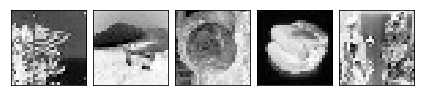

In [92]:
# Show the ground truth labels and the network's predictions
show_predictions(net, device, testloader)

In [93]:
# Let us compute the accuracy on the test set
accuracy = compute_accuracy(net, device, testloader)
print('Accuracy of the network on the test images: %.3f' % accuracy)

Accuracy of the network on the test images: 0.218
